In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

### Compare the f-sweeps with f held constant to when f is allowed to mutate.

In [23]:
f01 = pd.read_csv("../ParamSweeps/f/fSweep_0.1_0_ID.csv")
f1 = pd.read_csv("../ParamSweeps/f/fSweep_1_0_ID.csv")
f10 = pd.read_csv("../ParamSweeps/f/fSweep_10_0_ID.csv")
f100 = pd.read_csv("../ParamSweeps/f/fSweep_100_0_ID.csv")
f1000 = pd.read_csv("../ParamSweeps/f/fSweep_1000_0_ID.csv")

#### for the fSweeps, dt was held constant at 10, so we'll compare to that

In [22]:
dt = pd.read_csv("../ParamSweeps/dt/dtSweep_10_0.csv")

In [26]:
wBarDF = pd.DataFrame({"f01":f01["w_bar"],
                        "f1":f1["w_bar"],
                        "f10":f10["w_bar"],
                        "f100":f100["w_bar"],
                        "f1000":f1000["w_bar"],
                        "dt":dt["w_bar"]})
wBarDF.tail()

,dt,f01,f1,f10,f100,f1000
995,0.885006,0.999998,0.999998,0.999997,0.999998,0.999998
996,0.884098,0.999998,0.999998,0.999998,0.999998,0.999998
997,0.881890,0.999998,0.999998,0.999998,0.999998,0.999998
998,0.883696,0.999998,0.999998,0.999998,0.999998,0.999998
999,0.885740,0.999998,0.999998,0.999998,0.999998,0.999998


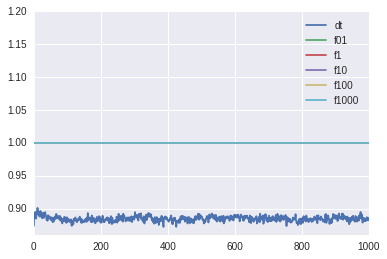

In [27]:
wBarDF.plot(ylim=(.86,1.2))

#### The populations have much higher fitness when f is not allowed to vary, and it doesn't much matter what the value of f is

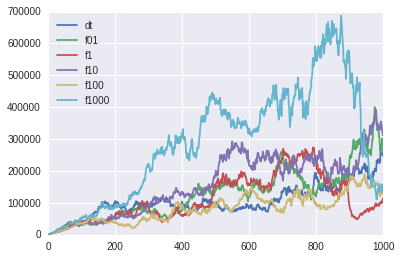

In [28]:
k1VarDF = pd.DataFrame({"f01":f01["k1_var"],
                        "f1":f1["k1_var"],
                        "f10":f10["k1_var"],
                        "f100":f100["k1_var"],
                        "f1000":f1000["k1_var"],
                        "dt":dt["k1_var"]})
k1VarDF.plot()

#### f1000 is a little bigger, but then drops. Not really a significant change from when f is allowed to vary (dt=10)

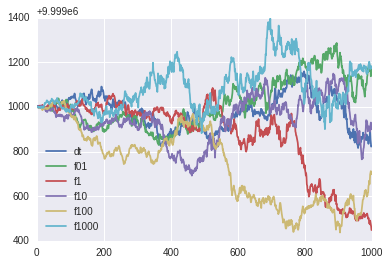

In [50]:
k1BarDF = pd.DataFrame({"f01":f01["mean_k1"],
                        "f1":f1["mean_k1"],
                        "f10":f10["mean_k1"],
                        "f100":f100["mean_k1"],
                        "f1000":f1000["mean_k1"],
                        "dt":dt["mean_k1"]})
k1BarDF.plot()

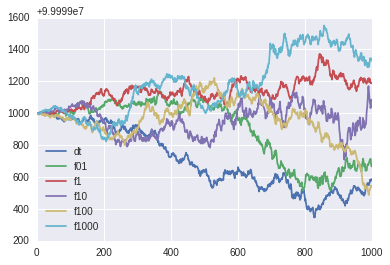

In [51]:
k2BarDF = pd.DataFrame({"f01":f01["mean_k2"],
                        "f1":f1["mean_k2"],
                        "f10":f10["mean_k2"],
                        "f100":f100["mean_k2"],
                        "f1000":f1000["mean_k2"],
                        "dt":dt["mean_k2"]})
k2BarDF.plot()

### Compare all the fSweeps

In [29]:
tmp = !ls ../ParamSweeps/f/*.csv
files = list((tmp))

In [30]:
def plot_vars(infile_list,paramName,log=True):
    
    ax = plt.plot()

    styleD1 = {"0.1":"b--","1":"r--","10":"g--","100":"k--","1000":"m--"}
    styleD2 = {"0.1":"blue","1":"red","10":"green","100":"black","1000":"magenta"}

    for f in infile_list:
        df = pd.read_csv(f)
        df[paramName].plot(style=styleD1[f.split("_")[1]],label=paramName.split("_")[0])

    if log:
        plt.yscale("log")
    plt.ylabel("%s variance" % paramName.split("_")[0])
    plt.xlabel("Generation")
    
    legend_proxies = []
    dts = styleD2.keys()
    dts.sort(key=float)
    dts.reverse()
    
    for dt in dts:
        prox = mlines.Line2D([], [], color=styleD2[dt], label=dt, linewidth=3)
        legend_proxies.append(prox)

    plt.legend(handles=legend_proxies,bbox_to_anchor=(1.25,1),title="f")

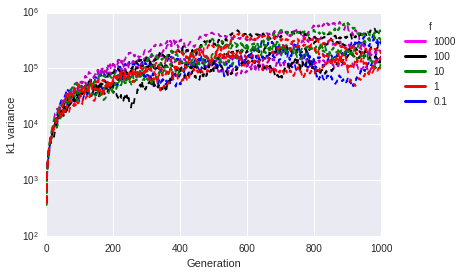

In [33]:
plot_vars(files,"k1_var",log=True)

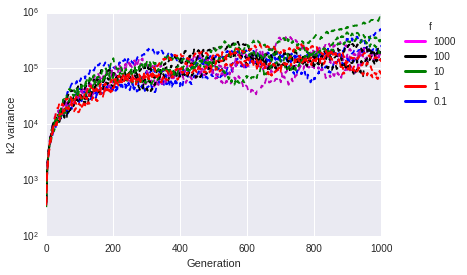

In [34]:
plot_vars(files,"k2_var",log=True)

#### Mostly the variance accumlation looks the same for all fs - and also not that different from dt = 10 when f is allowed to vary

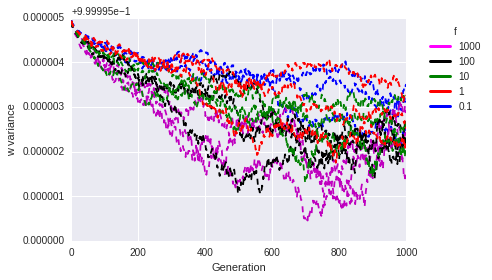

In [35]:
plot_vars(files,"w_bar",log=False)

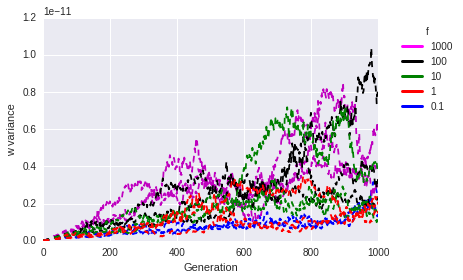

In [36]:
plot_vars(files,"w_var",log=False)

### Let's take a closer look at the correlations in the data

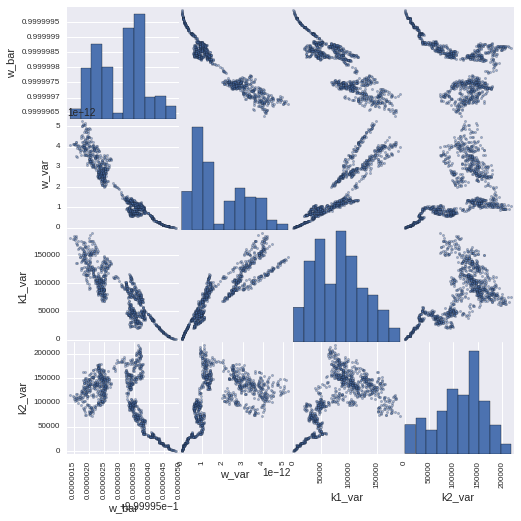

In [39]:
variances = f100.ix[:,1:5]
axes = scatter_matrix(variances,figsize=(8,8))

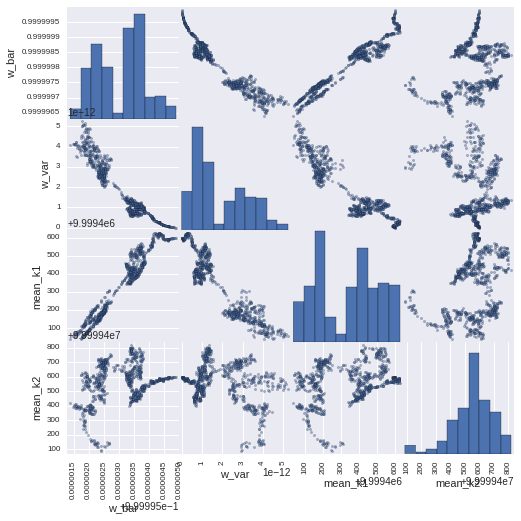

In [40]:
means = pd.concat([f100.ix[:,1:3],f100.ix[:,6:-1]], axis=1)
axes = scatter_matrix(means,figsize=(8,8))

#### Definitely some interesting structure there...

### Now color by generation

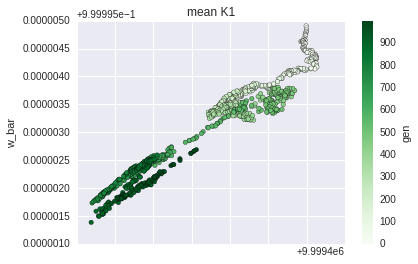

In [47]:
f100.plot(kind="scatter",x="mean_k1",y="w_bar",c="gen",colormap="Greens",ylim=(.999996,1))

plt.title("mean k1")

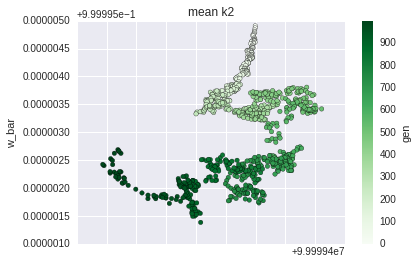

In [49]:
f100.plot(kind="scatter",x="mean_k2",y="w_bar",c="gen",colormap="Greens",ylim=(.999996,1))

plt.title("mean k2")

#### This is kind of cool. The value of the k parameters looks like an MCMC with respect to fitness, except opposite - i.e. fitness steadily goes down.

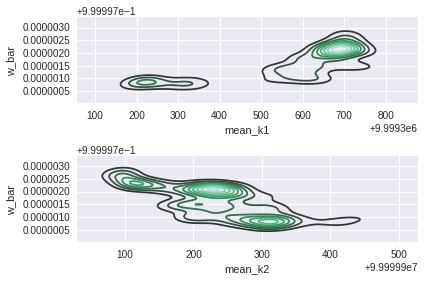

In [53]:
fig,(ax1,ax2) = plt.subplots(2)
sns.kdeplot(f1["mean_k1"],f1["w_bar"],ax=ax1,title="mean k1")
sns.kdeplot(f1["mean_k2"],f1["w_bar"],ax=ax2,title="mean k2")
plt.tight_layout()

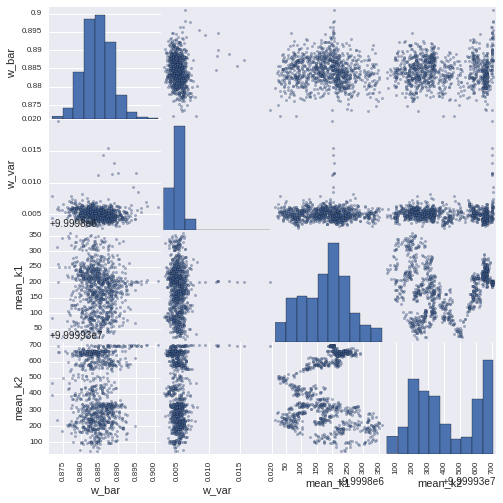

In [54]:
dt_means = pd.concat([dt.ix[:,1:3],dt.ix[:,6:-1]], axis=1)
axes = scatter_matrix(dt_means,figsize=(8,8))

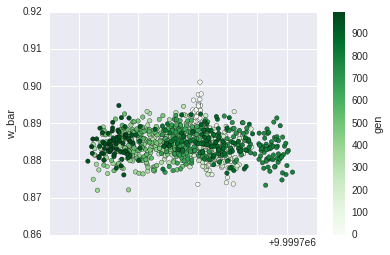

In [56]:
dt.plot(kind="scatter",x="mean_k1",y="w_bar",c="gen",colormap="Greens")

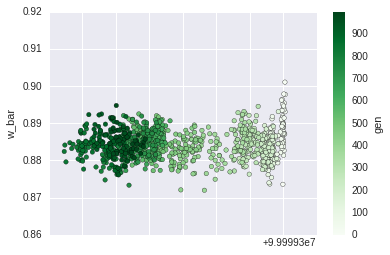

In [57]:
dt.plot(kind="scatter",x="mean_k2",y="w_bar",c="gen",colormap="Greens")

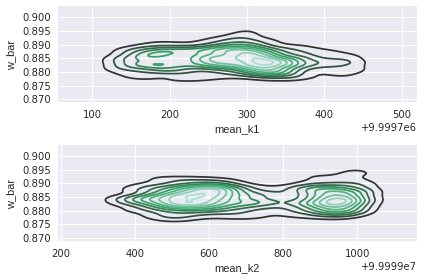

In [24]:
fig,(ax1,ax2) = plt.subplots(2)
sns.kdeplot(dt1["mean_k1"],dt1["w_bar"],ax=ax1)
sns.kdeplot(dt1["mean_k2"],dt1["w_bar"],ax=ax2)
plt.tight_layout()

#### Both ks look a lot less structured with respect to mean fitness and generation when f varies, but this could be just that fitness is so much lower and varying on a much larger scale